## Merge all data

In [134]:
import pandas as pd

In [135]:
data1 = pd.read_csv('./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
data2 = pd.read_csv('./data/PRSA_Data_Changping_20130301-20170228.csv')
data3 = pd.read_csv('./data/PRSA_Data_Dingling_20130301-20170228.csv')
data4 = pd.read_csv('./data/PRSA_Data_Dongsi_20130301-20170228.csv')
data5 = pd.read_csv('./data/PRSA_Data_Guanyuan_20130301-20170228.csv')
data6 = pd.read_csv('./data/PRSA_Data_Gucheng_20130301-20170228.csv')
data7 = pd.read_csv('./data/PRSA_Data_Huairou_20130301-20170228.csv')
data8 = pd.read_csv('./data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
data9 = pd.read_csv('./data/PRSA_Data_Shunyi_20130301-20170228.csv')
data10 = pd.read_csv('./data/PRSA_Data_Tiantan_20130301-20170228.csv')
data11 = pd.read_csv('./data/PRSA_Data_Wanliu_20130301-20170228.csv')
data12 = pd.read_csv('./data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [136]:
frames = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12] 
result = pd.concat(frames).reset_index(drop=True)
result

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [137]:
result.to_csv(r'./dashboard/main_data.csv', index=False)

## Analisis Data

1. Bagaimana kondisi kualitas udara pada setiap station?
2. Bagaimana kondisi kadar Karbon monoksida (CO) untuk setiap tahun?

In [138]:
import matplotlib.pyplot as plt
from collections import OrderedDict

In [139]:
all = result.copy()
aotizhongxin = data1.copy()
changping = data2.copy()
dingling = data3.copy()
dongsi = data4.copy()
guanyuan = data5.copy()
gucheng = data6.copy()
huairou = data7.copy()
nongzhanguan = data8.copy()
shunyi = data9.copy()
tiantan = data10.copy()
wanliu = data11.copy()
wanshouxigong = data12.copy()

### Bagaimana kondisi kadar senyawa pada udara di setiap station?

#### Memvisualisasikan kondisi kadar senyawa setiap stasiun

In [140]:
def all_senyawa_kadar_visualisasi(data):
    all_senyawa = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
    kadar = data[all_senyawa].mean()

    kadar_senyawa = {}
    for i in range(len(all_senyawa)):
        senyawa = all_senyawa[i]
        kadar_senyawa[senyawa] = kadar[senyawa].mean()

    plt.figure(figsize = (5, 3))
    plt.bar(list(kadar_senyawa.keys()), list(kadar_senyawa.values()), color ='maroon', width = 0.4)
    plt.xlabel("Senyawa")
    plt.ylabel("Rata-rata Kadar Senyawa")
    plt.title(f'Kadar senyawa pada stasiun {data.station[0]}')
    plt.show()

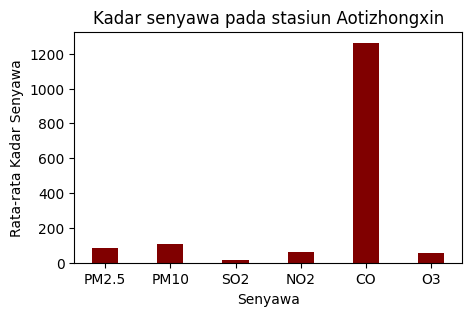

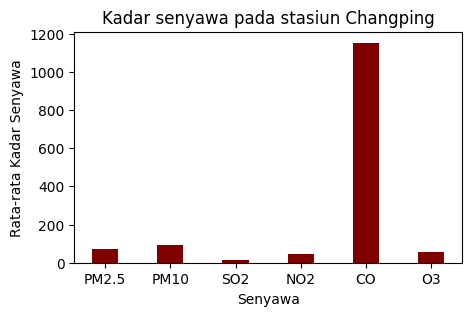

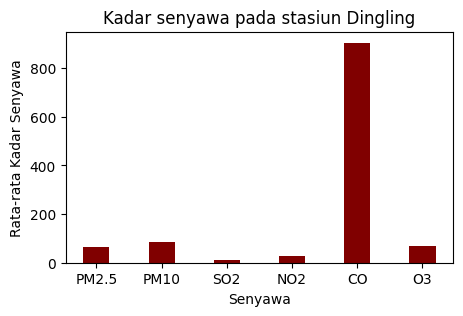

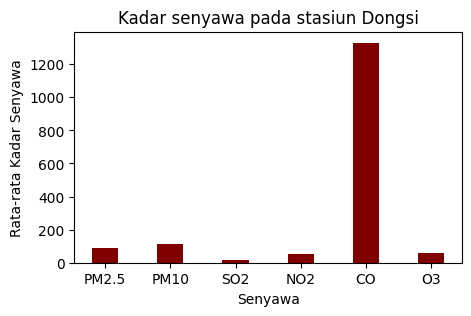

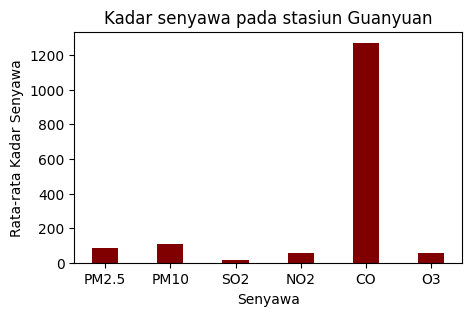

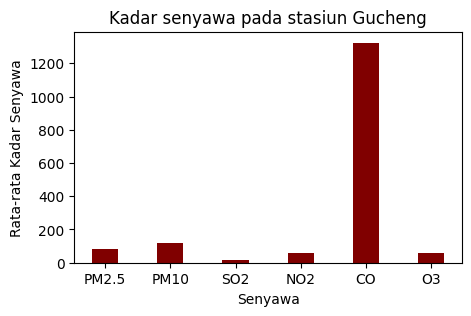

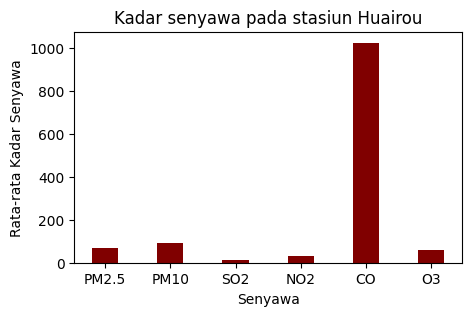

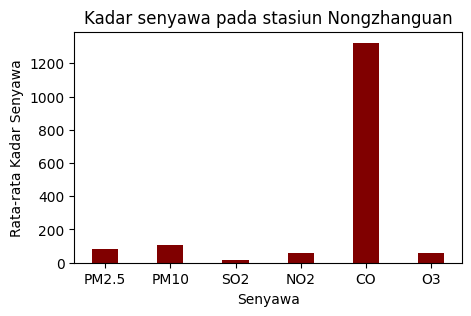

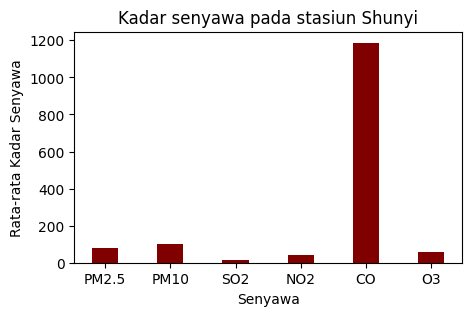

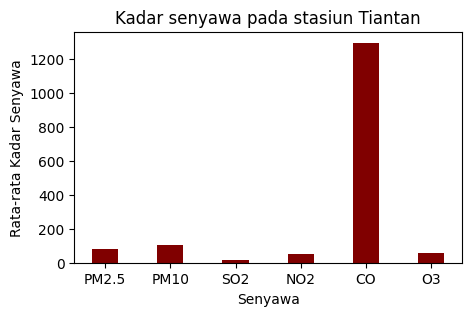

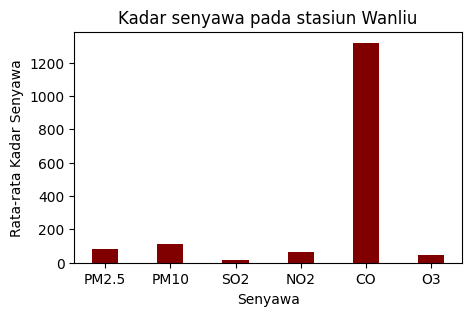

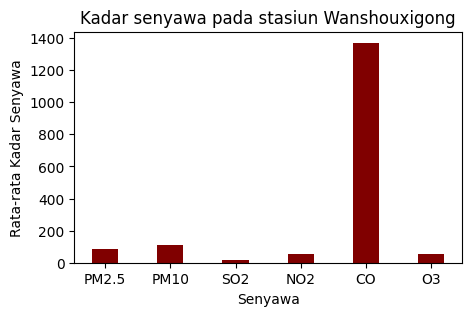

In [141]:
all_data = [aotizhongxin, changping, dingling, dongsi, guanyuan, gucheng,
            huairou, nongzhanguan, shunyi, tiantan, wanliu, wanshouxigong]
for data in all_data:
    all_senyawa_kadar_visualisasi(data)

Dari beberapa grafik di atas didapatkan bahwa setiap stasion kadar tertinggi pada senyawa CO dan terendah pada SO2.

#### Memvisualisasikan kondisi kadar senyawa pada stasiun untuk setiap senyawa

In [142]:
def senyawa_kadar_visualisasi(senyawa):
    stasiun = ["Aotizhongxin", "Changping", "Dingling", "Dongsi", "Guanyuan", "Gucheng",
            "Huairou", "Nongzhanguan", "Shunyi", "Tiantan", "Wanliu", "Wanshouxigong"]
    
    all_data = [aotizhongxin, changping, dingling, dongsi, guanyuan, gucheng,
            huairou, nongzhanguan, shunyi, tiantan, wanliu, wanshouxigong]
    
    stasiun_kadar = {}
    for i in range(len(all_data)):
        stasiun_kadar[stasiun[i]] = all_data[i][senyawa].mean()

    sorted_stasiun_kadar = OrderedDict(sorted(stasiun_kadar.items(), key=lambda x: x[1]))

    plt.figure(figsize = (7, 5))
    plt.bar(list(sorted_stasiun_kadar.keys()), list(sorted_stasiun_kadar.values()), color ='maroon', width = 0.4)
    plt.xlabel("Tempat Stasion")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Rata-rata Kadar Senyawa")
    plt.title(f'Kadar Senyawa {senyawa} pada setiap stasiun')
    plt.show()

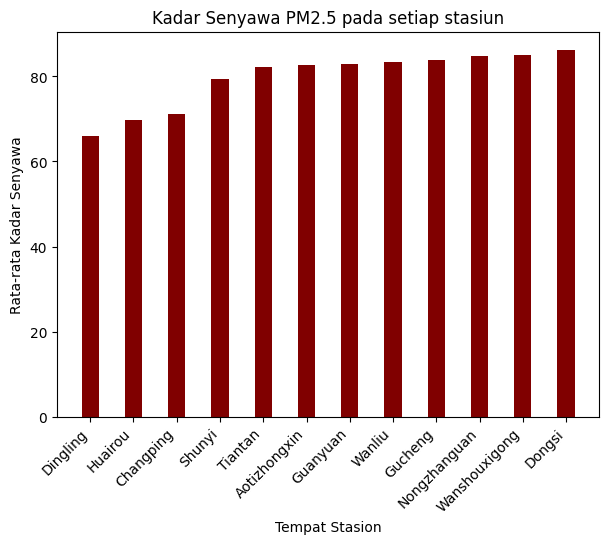

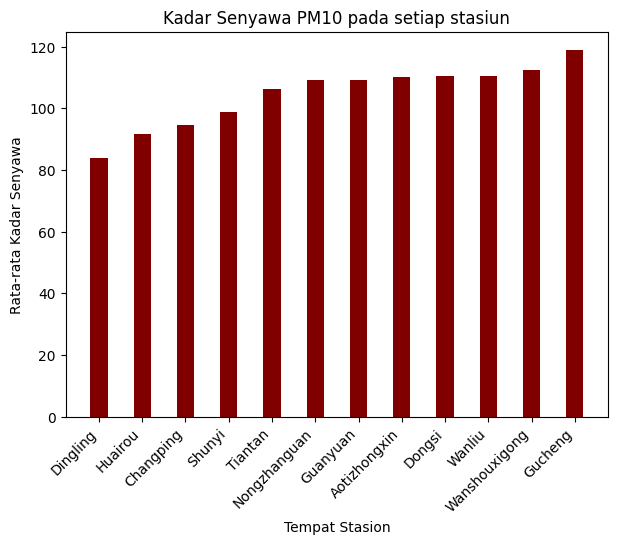

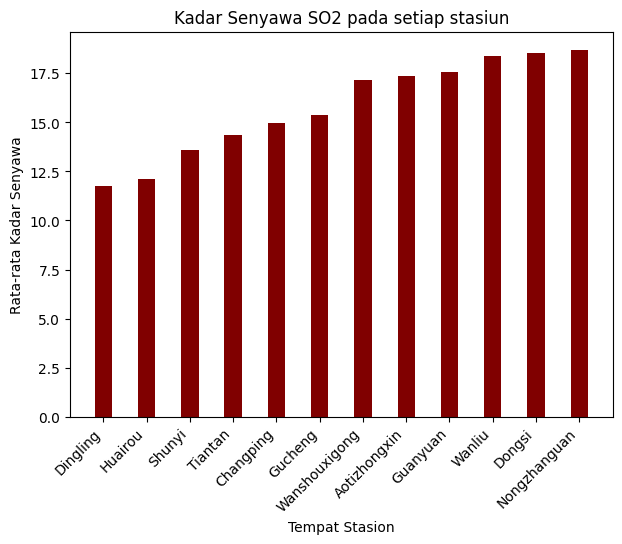

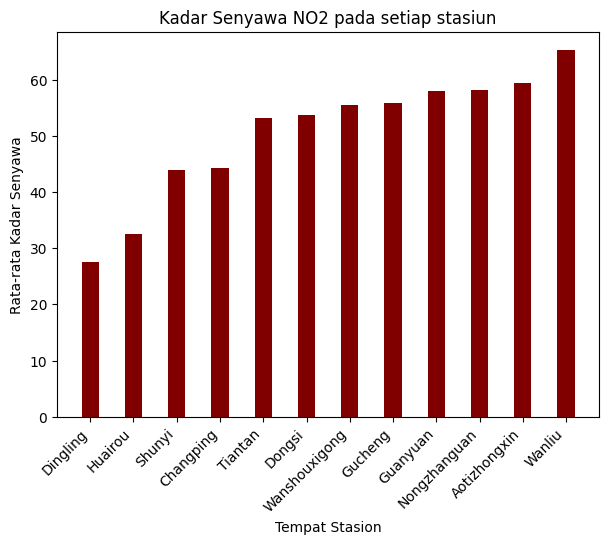

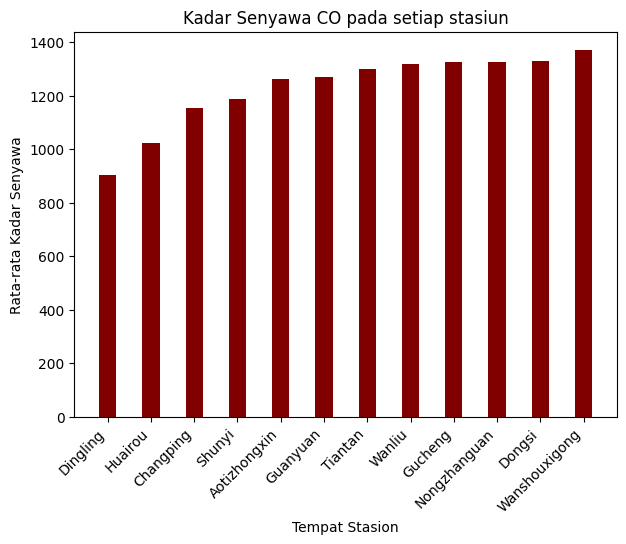

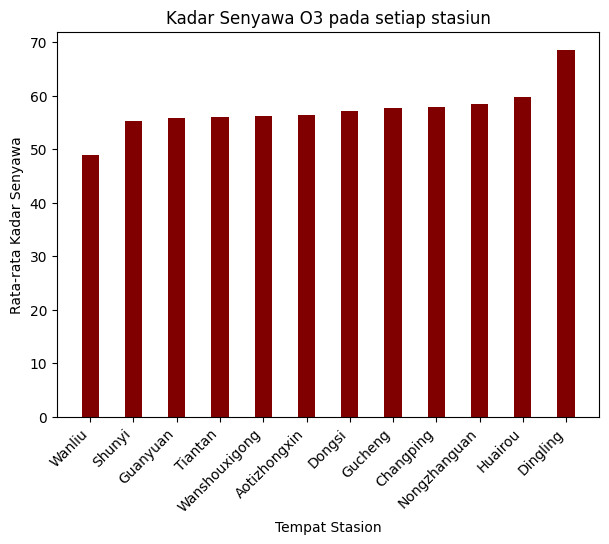

In [143]:
all_senyawa = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
for senyawa in all_senyawa:
    senyawa_kadar_visualisasi(senyawa)

Dari beberapa grafik didapatkan bahwa:
- Kadar kandungan PM2.5 tertinggi pada station Dongsi
- Kadar kandungan PM10 tertinggi pada station Gucheng
- Kadar kandungan SO2 tertinggi pada station Nongzhanguan
- Kadar kandungan NO2 tertinggi pada station Wanliu
- Kadar kandungan CO tertinggi pada station Wanshouxigong
- Kadar kandungan O3 tertinggi pada station Dingling

### Bagaimana kondisi kadar Karbon monoksida (CO) untuk setiap tahun?

#### Perbandingan setiap tahun

In [144]:
all

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


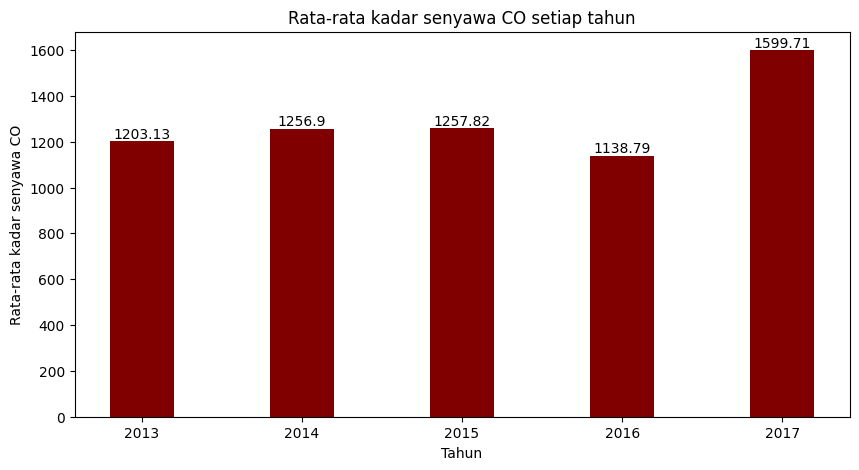

In [145]:
year = all.groupby('year')
year_co = year['CO'].mean()
kadar_year = {}
for year, value in year_co.items():
    kadar_year[year] = value

plt.figure(figsize = (10, 5))
bars = plt.bar(list(kadar_year.keys()), list(kadar_year.values()), color ='maroon', width = 0.4)

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(list(kadar_year.values())[i], 2)), ha='center', va='bottom')

plt.xlabel("Tahun")
plt.ylabel("Rata-rata kadar senyawa CO")
plt.title(f'Rata-rata kadar senyawa CO setiap tahun')
plt.show()

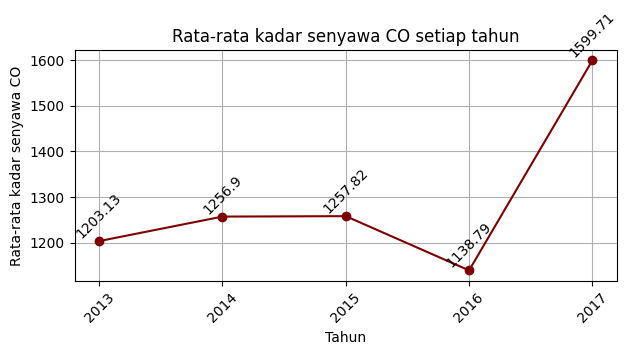

In [146]:
year = all.groupby('year')
year_co = year['CO'].mean()
kadar_year = {}
for year, value in year_co.items():
    kadar_year[year] = value

plt.figure(figsize = (7, 3))
plt.plot(list(kadar_year.keys()), list(kadar_year.values()), color ='maroon', marker='o')

for i, value in enumerate(list(kadar_year.values())):
    plt.text(list(kadar_year.keys())[i], value, str(round(value, 2)), ha='center', va='bottom', rotation=45)

plt.xlabel("Tahun")
plt.xticks(list(kadar_year.keys()), list(kadar_year.keys()), rotation=45, ha='center')
plt.ylabel("Rata-rata kadar senyawa CO")
plt.title(f'Rata-rata kadar senyawa CO setiap tahun')
plt.grid(True)
plt.show()

Dari grafik ini perlu diperhatikan bahwa pada 2017 cenderung naik padahal pada tahun 2016 lebih rendah dari tahun-tahun sebelumnya.

#### Perbandingan kenaikan tiap bulan

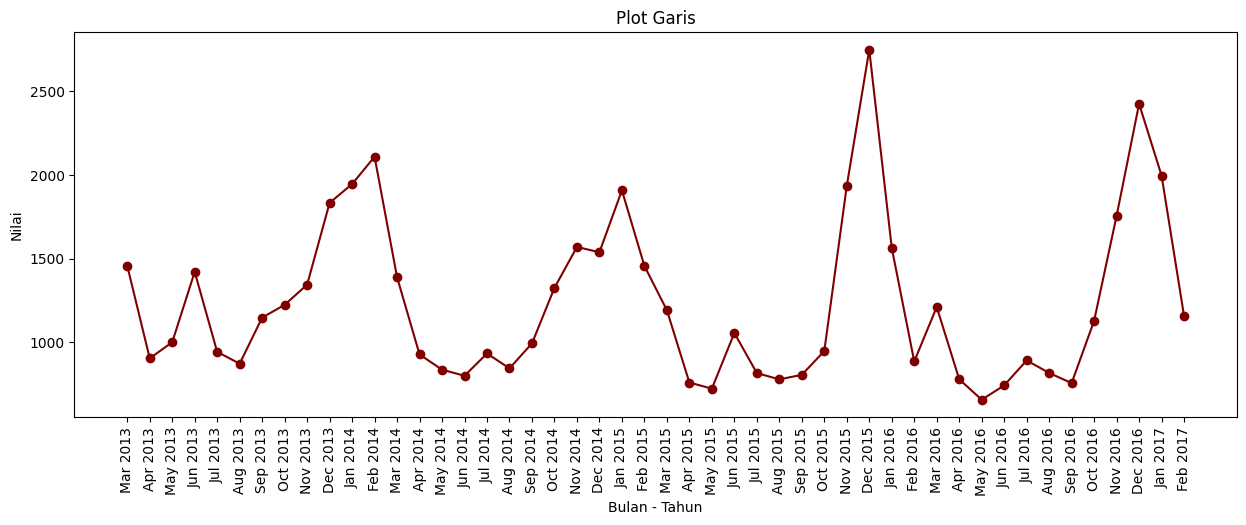

In [147]:
year_month = all.groupby(['year', 'month'])
mean_year_month = year_month['CO'].mean()
mean_year_month = mean_year_month.reset_index()

dict_data = {}
for year, month, value in mean_year_month.values:
    dict_data[(int(year), int(month))] = value
    
all_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

year_months = []
values = []
for key, value in dict_data.items():
    year, month = key
    year_months.append(f'{all_month[month-1]} {year}')
    values.append(value)

plt.figure(figsize=(15, 5))
plt.plot(year_months, values, marker='o', color='maroon')

plt.xlabel("Bulan - Tahun")
plt.xticks(rotation=90, ha='center')
plt.ylabel("Nilai")
plt.title("Plot Garis")

plt.show()

Dari grafik yang di dapatkan bahwa kadar kandungan CO ini digambarkan secara fluktuatif. Dengan grafik fluktuatif ini dapat menjadi bahan bagi pemerintah dan masyarakat untuk memperbaiki kadar kandungan CO ini dengan memberikan program atau sosialisasi dan kesadaran dari masyarakat sendiri mengingat senyawa CO ini cukup berbahaya bagi kesehatan manusia.

##### Per tahun

In [148]:
dict_data = {}

dict_data[2013] = {}
dict_data[2013][1] = None
dict_data[2013][2] = None

In [149]:
year_month = all.groupby(['year', 'month'])
mean_year_month = year_month['CO'].mean()
mean_year_month = mean_year_month.reset_index()

for year, month, value in mean_year_month.values:
    try:
        data = dict_data[int(year)]
    except:
        data = {}
    
    data[int(month)] = value
    dict_data[int(year)] = data

In [150]:
dict_data[2017][3] = None
dict_data[2017][4] = None
dict_data[2017][5] = None
dict_data[2017][6] = None
dict_data[2017][7] = None
dict_data[2017][8] = None
dict_data[2017][9] = None
dict_data[2017][10] = None
dict_data[2017][11] = None
dict_data[2017][12] = None

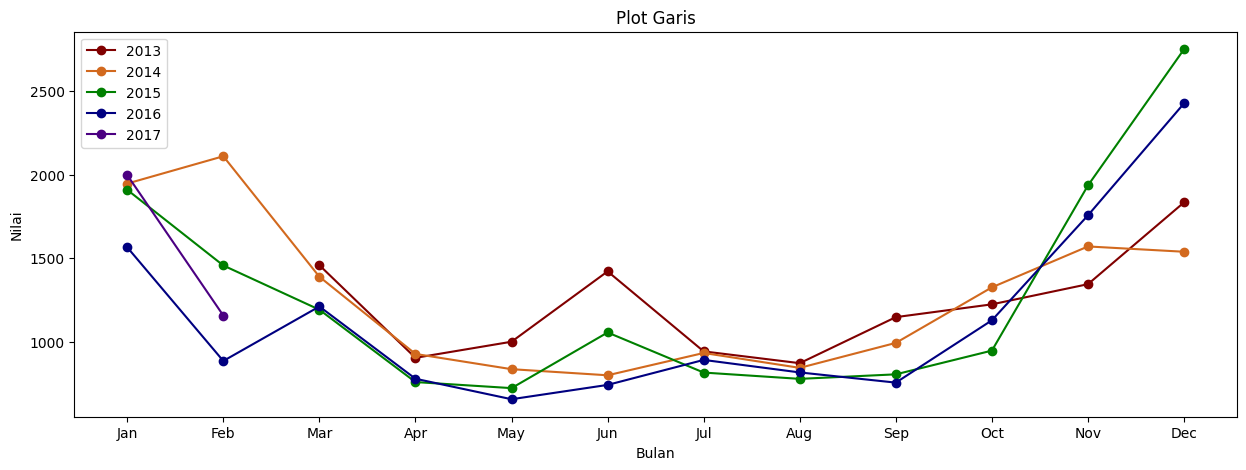

In [151]:
all_year = list(dict_data.keys())
all_color = ["maroon", "chocolate", "green", "navy", "indigo"]
all_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(15, 5))

for i in range(len(all_year)):
    year = all_year[i]
    color = all_color[i]
    data = dict_data[year]

    year_months = []
    values = []
    for month, value in data.items():
        year_months.append(f'{all_month[month-1]}')
        values.append(value)

    plt.plot(year_months, values, marker='o', color=color, label=year)

plt.xlabel("Bulan")
plt.ylabel("Nilai")
plt.title("Plot Garis")
plt.legend()
plt.show()
    

Dari grafik yang di dapatkan bahwa terdapat kenaikan kadar CO di pada akhir tahun setiap tahunnya, terutama 2 tahun terakhir 2015 dan 2016. Perlu di cari tahu kenapa kadar CO ini cenderung tinggi pada akhir tahun.

# Clustering

In [ ]:
df_clustering = result.copy()
df_clustering.tail()

## Preprocessing data

In [185]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn.decomposition import PCA

In [169]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

In [171]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


### Missing Values

In [174]:
cek_null(df_clustering)

       Total   Percent
WSPM     318  0.000756
RAIN     390  0.000927
PRES     393  0.000934
TEMP     398  0.000946
DEWP     403  0.000958
PM10    6449  0.015327
PM2.5   8739  0.020769
SO2     9021  0.021439
NO2    12116  0.028795
O3     13277  0.031554
CO     20701  0.049198


Missing values sedikit

In [175]:
df_clustering.dropna(inplace=True)
cek_null(df_clustering)

Tidak ditemukan missing value pada dataset


### Duplicates Data

In [176]:
df_clustering.duplicated().sum()

0

### Outliers

In [177]:
# Melihat jumlah outlier 

Jumlah_Outlier = []

for i in df_clustering.columns:

  # Melakukan looping untuk mencari outlier setiap kolom yang isinya bukan tipe data object
  if (df_clustering[i].dtypes != 'object'):
    data = df_clustering[i]

    # Mencari nilai IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Mencari RUB dan RLB
    RLB = Q1 - 1.5 * IQR
    RUB = Q3 + 1.5 * IQR

    # Mencari banyak outlier
    outlier_lower = data[data < RLB]
    outlier_upper = data[data > RUB]
    jumlah_outlier = len(outlier_lower) + len(outlier_upper)
    persentase_outlier = jumlah_outlier/len(df_clustering)

    Jumlah_Outlier.append([i, jumlah_outlier, persentase_outlier])

pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Jumlah Outliers','Persentase Outliers']).sort_values(by=['Jumlah Outliers'], ascending = False,ignore_index=True)

,Column,Jumlah Outliers,Persentase Outliers
0,SO2,33516,0.087376
1,CO,26857,0.070016
2,WSPM,20989,0.054718
3,PM2.5,17762,0.046305
4,RAIN,15168,0.039543
5,O3,14985,0.039066
6,PM10,13570,0.035377
7,NO2,6560,0.017102
8,PRES,0,0.000000
9,wd,0,0.000000


Menurut saya, outliers tergolong wajar

### Encoding

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df_clustering['wd']= label_encoder.fit_transform(df_clustering['wd'])
df_clustering['station']= label_encoder.fit_transform(df_clustering['station'])

## Proses Clustering

Menggunakan data numerikal kontinu saja

In [178]:
continues = []
for i in df_clustering.columns:
  if len(df_clustering[i].value_counts()) > 30:
    continues.append(i)
continues.remove('No')
continues.remove('day')
continues

['PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'WSPM']

In [179]:
scaler = MinMaxScaler()

In [180]:
df_clustering_scaled = scaler.fit_transform(df_clustering)
df_clustering_scaled = pd.DataFrame(df_clustering_scaled, index = df_clustering.index, columns = df_clustering.columns)

Kmeans Clustering

d:\KULIAH\Semester 6\Bangkit\Dicoding\submission\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\KULIAH\Semester 6\Bangkit\Dicoding\submission\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\KULIAH\Semester 6\Bangkit\Dicoding\submission\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\KULIAH\Semester 6\Bangkit\Dicoding\submission\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0, 0.5, 'Inertia')

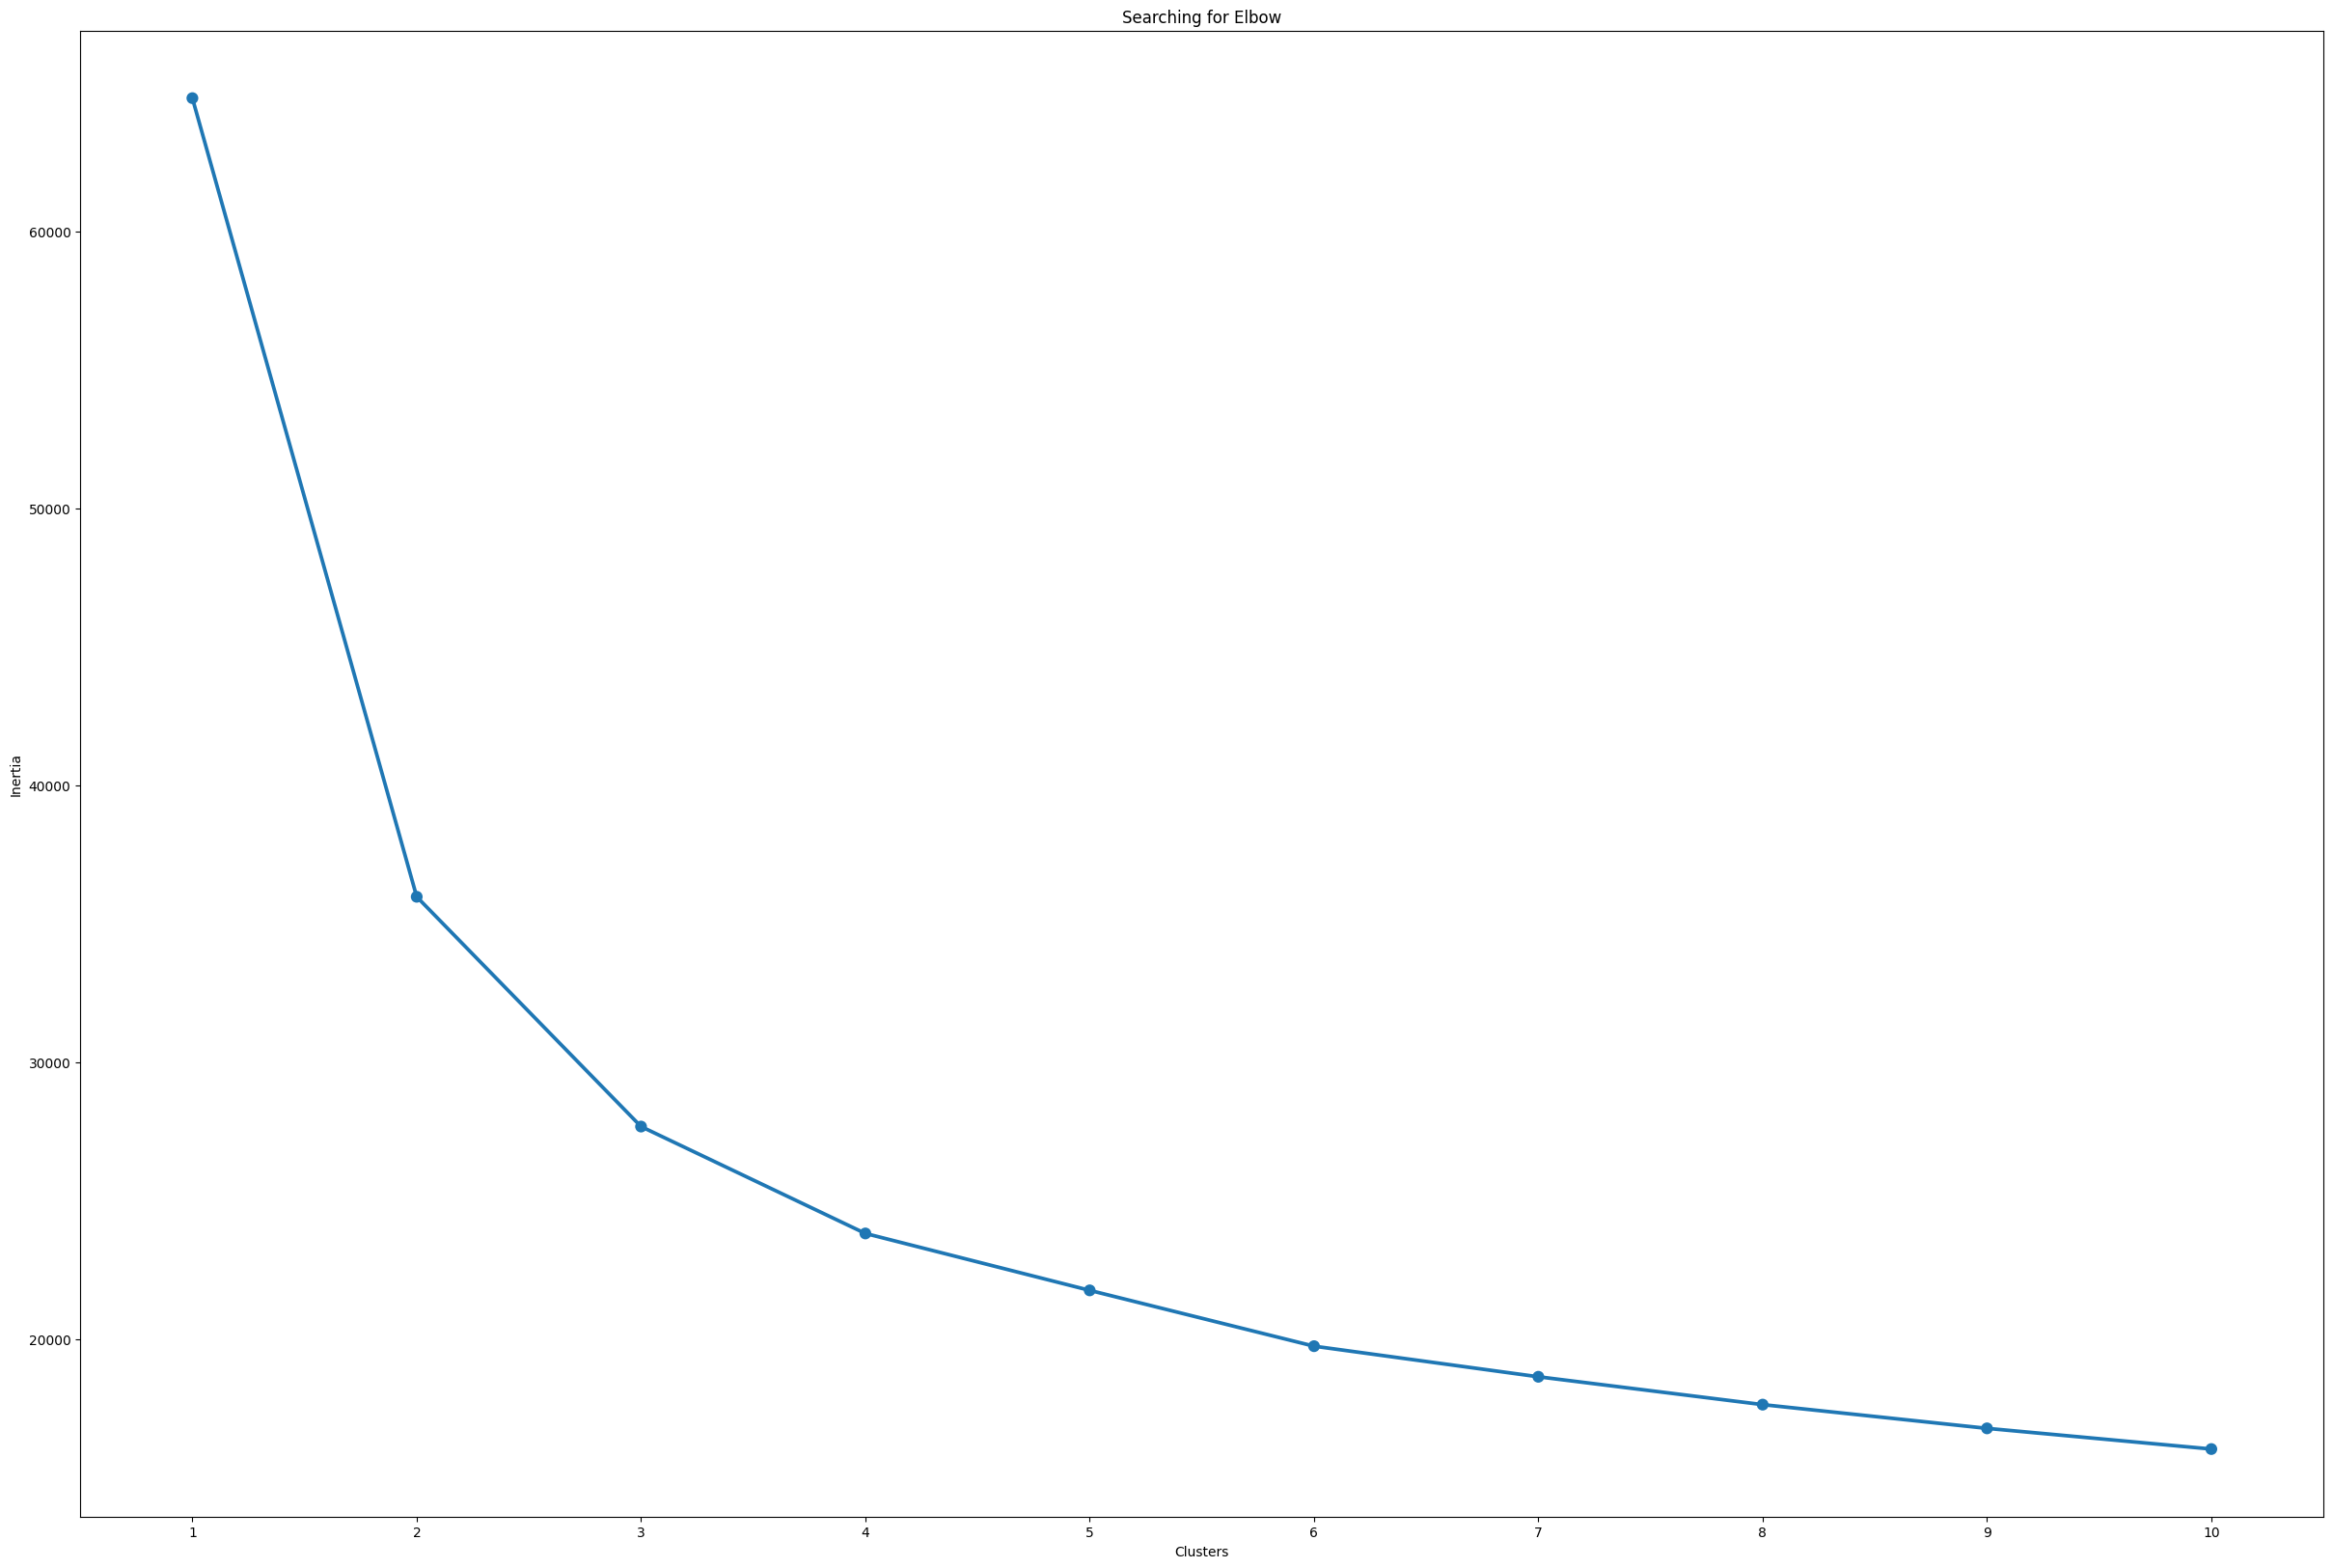

In [181]:
clusters = []

for i in range(1, len(df_clustering_scaled[continues].columns)):
    km = KMeans(n_clusters=i, random_state=2021).fit(df_clustering_scaled[continues])
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(30, 20))
sns.pointplot(x=list(range(1, len(df_clustering_scaled[continues].columns))),
              y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

### PCA

In [207]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(df_clustering_scaled[continues])

d:\KULIAH\Semester 6\Bangkit\Dicoding\submission\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [208]:
pca = PCA()
trans_pca = pca.fit_transform(df_clustering_scaled[continues])
explained_variants = pca.explained_variance_ratio_
explained_variants

array([0.57296485, 0.23717096, 0.06509595, 0.04122894, 0.02855876,
       0.01983032, 0.01728704, 0.0068283 , 0.00551905, 0.00477332,
       0.00074251])

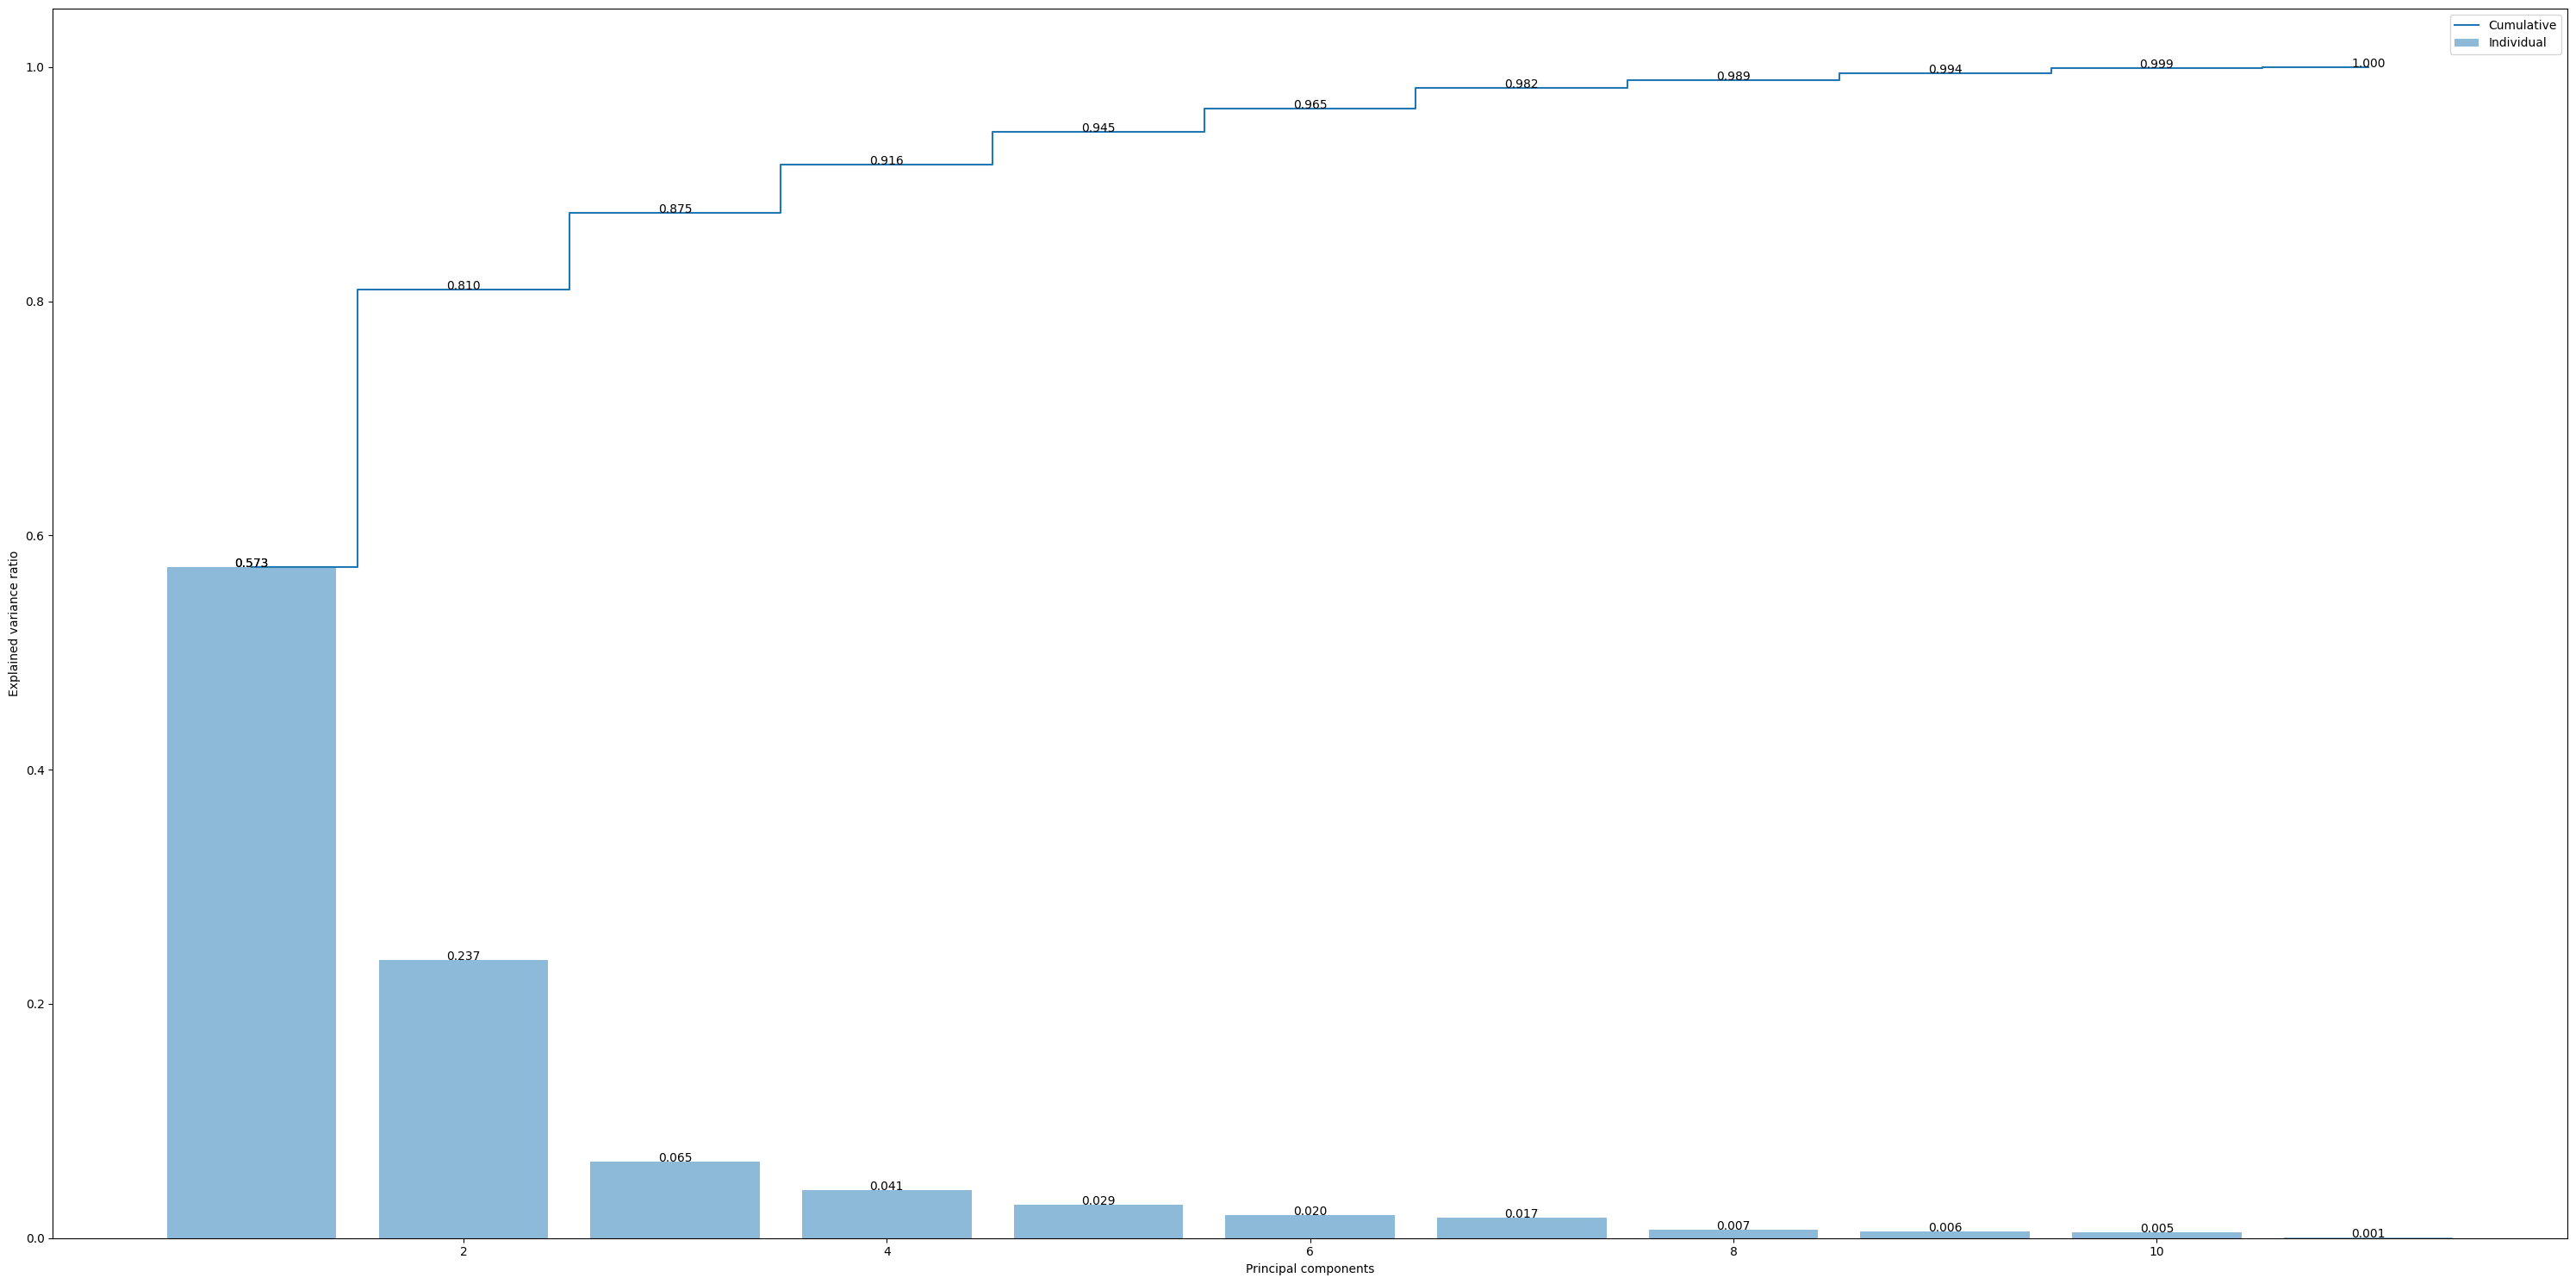

In [209]:
# Pengukuran menggunakan explained variance yang dihitung dari nilai eigen untuk menentukan k komponen utama

# explained variance
total = sum(np.abs(explained_variants))
eigval_rev = sorted(np.abs(explained_variants), reverse=True)
var_exp = [(i / total) for i in eigval_rev]

# kumulatif dari variansi data
cumsum = np.cumsum(var_exp)

# plotting
plt.figure(figsize=(30, 15))
plt.bar(range(1, explained_variants.size + 1), var_exp,
        alpha=0.5, align='center', label='Individual')
plt.step(range(1, explained_variants.size + 1), cumsum,
         where='mid',  label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

# bar value (explained variance)
for index, value in enumerate(var_exp):
    plt.text(index+1, value, str('{0:.3f}'.format(value)), ha='center')

# cumulative value
for index, value in enumerate(cumsum):
    plt.text(index+1, value, str('{0:.3f}'.format(value)), ha='center')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

Text(0.5, 0.92, 'Clusters of Dataset')

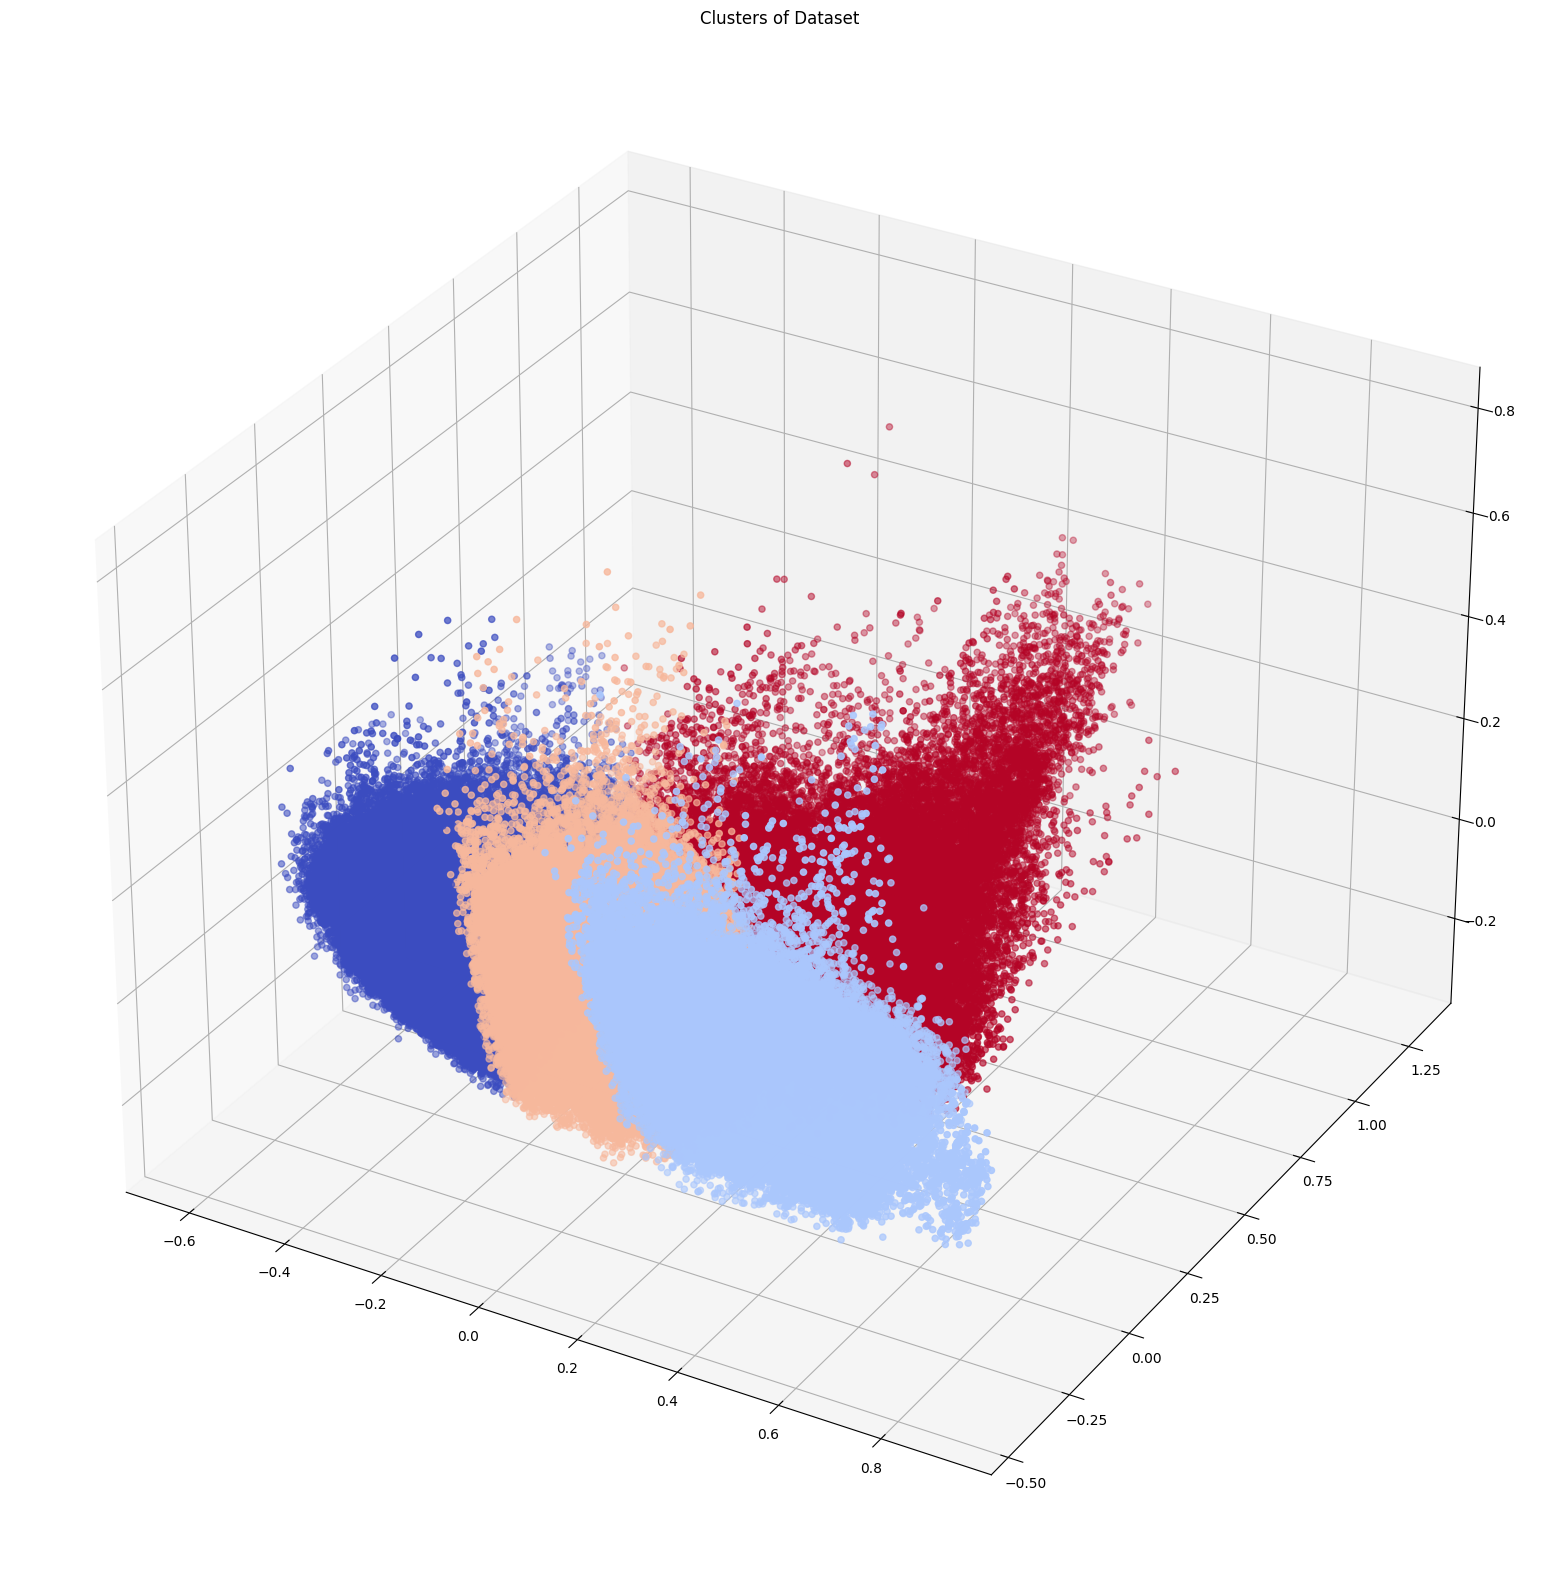

In [210]:
data = np.transpose(trans_pca)

plt.figure(figsize=(20, 20))

visualization = plt.axes(projection="3d")

visualization.scatter(data[0],
                      data[1],
                      data[2],
                      c=cluster_labels,
                      cmap="coolwarm")

plt.title("Clusters of Dataset")

In [211]:
df_clustering_2 = df_clustering.copy()

In [212]:
df_clustering_2['cluster'] = cluster_labels
df_clustering_2.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,cluster
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,7,2.4,11,1
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,14,0.9,11,1
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,7,1.1,11,1
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,6,1.2,11,1
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,5,1.3,11,1


In [213]:
lst = []
for i in df_clustering_2['cluster']:
  lst.append(str(i))
df_clustering_2['cluster'] = lst

In [214]:
df_cluster = df_clustering_2.groupby('cluster').mean().reset_index()
df_cluster.tail()

,cluster,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0,16927.591242,2014.553699,7.001849,15.970091,11.908344,68.361186,89.309399,7.768249,38.183348,915.612496,94.172344,25.286247,1000.664436,16.482567,0.143977,6.984927,1.586233,5.460626
1,1,19973.960324,2015.028414,5.463799,15.674704,11.389461,32.442373,51.403470,14.372706,36.459233,788.494443,41.872615,1.608759,1022.030995,-14.757702,0.007189,6.993825,2.328486,5.445882
2,2,16878.313627,2014.571375,6.729658,15.678887,11.323657,70.140833,105.132511,12.687746,52.256749,954.678233,44.171438,14.310835,1010.925744,2.826021,0.041874,7.024233,1.715251,5.512786
3,3,19266.498891,2014.865758,6.465287,15.183718,11.472607,211.393014,240.631396,43.947730,106.108727,3375.023477,11.622305,2.454995,1017.144594,-4.300429,0.003091,5.737318,1.069038,5.730776


In [215]:
def barchart_by_cluster(df, column):
  data = df.sort_values(by=column)
  fig, ax = plt.subplots(figsize=(20,10))
  bars = ax.bar(data['cluster'], data[column])
  ax.bar_label(bars)
  plt.xlabel("Cluster")
  plt.ylabel(column)
  plt.title(f'{column} Mean by Cluster')

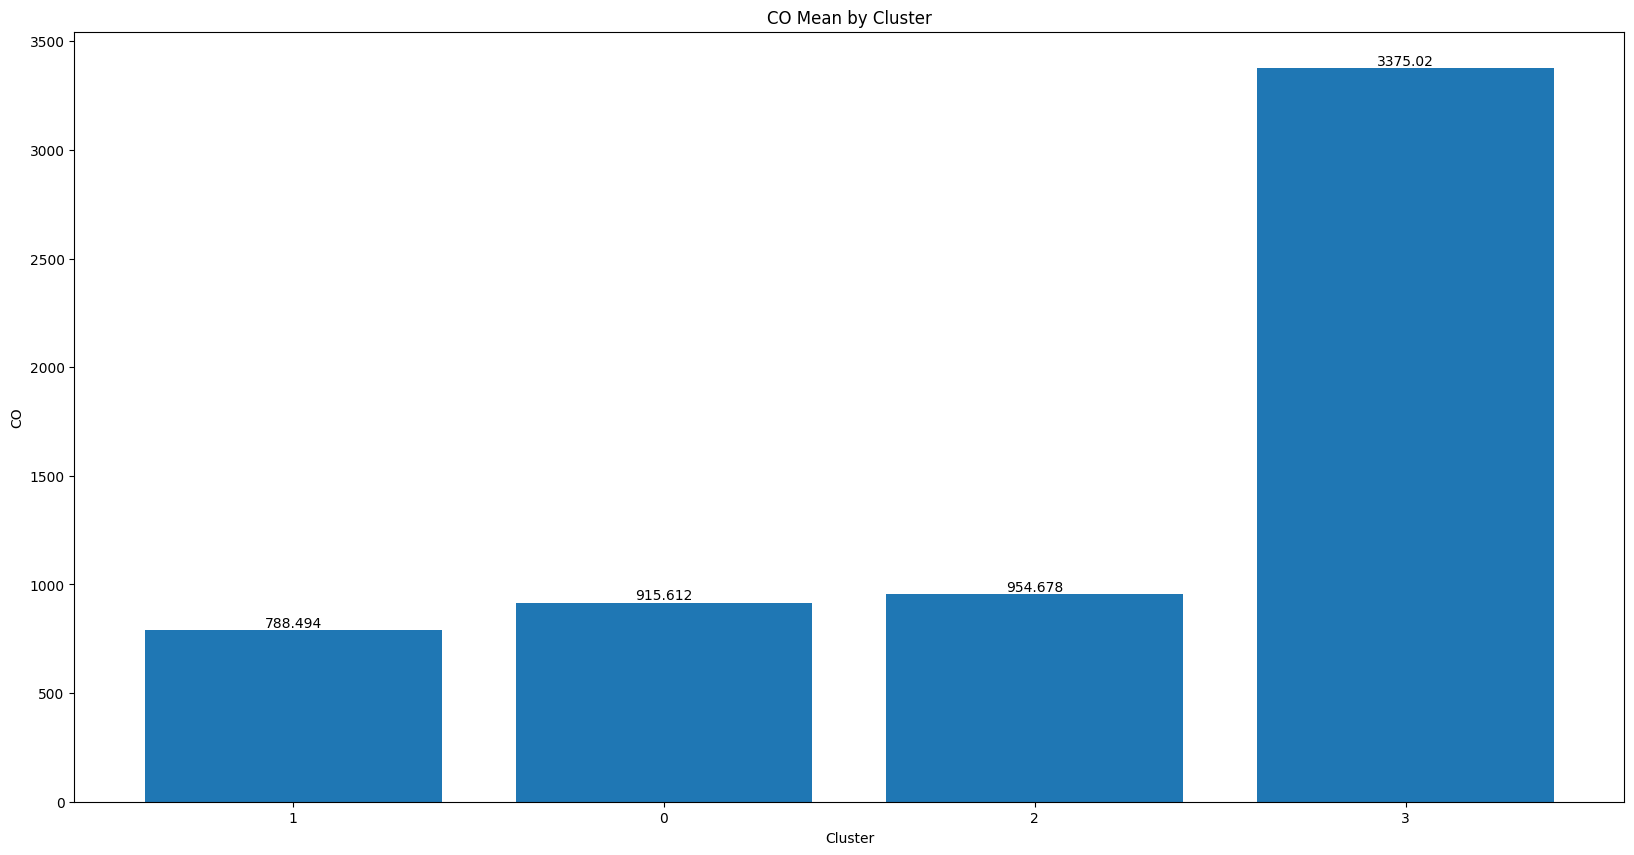

In [217]:
barchart_by_cluster(df_cluster, 'CO')

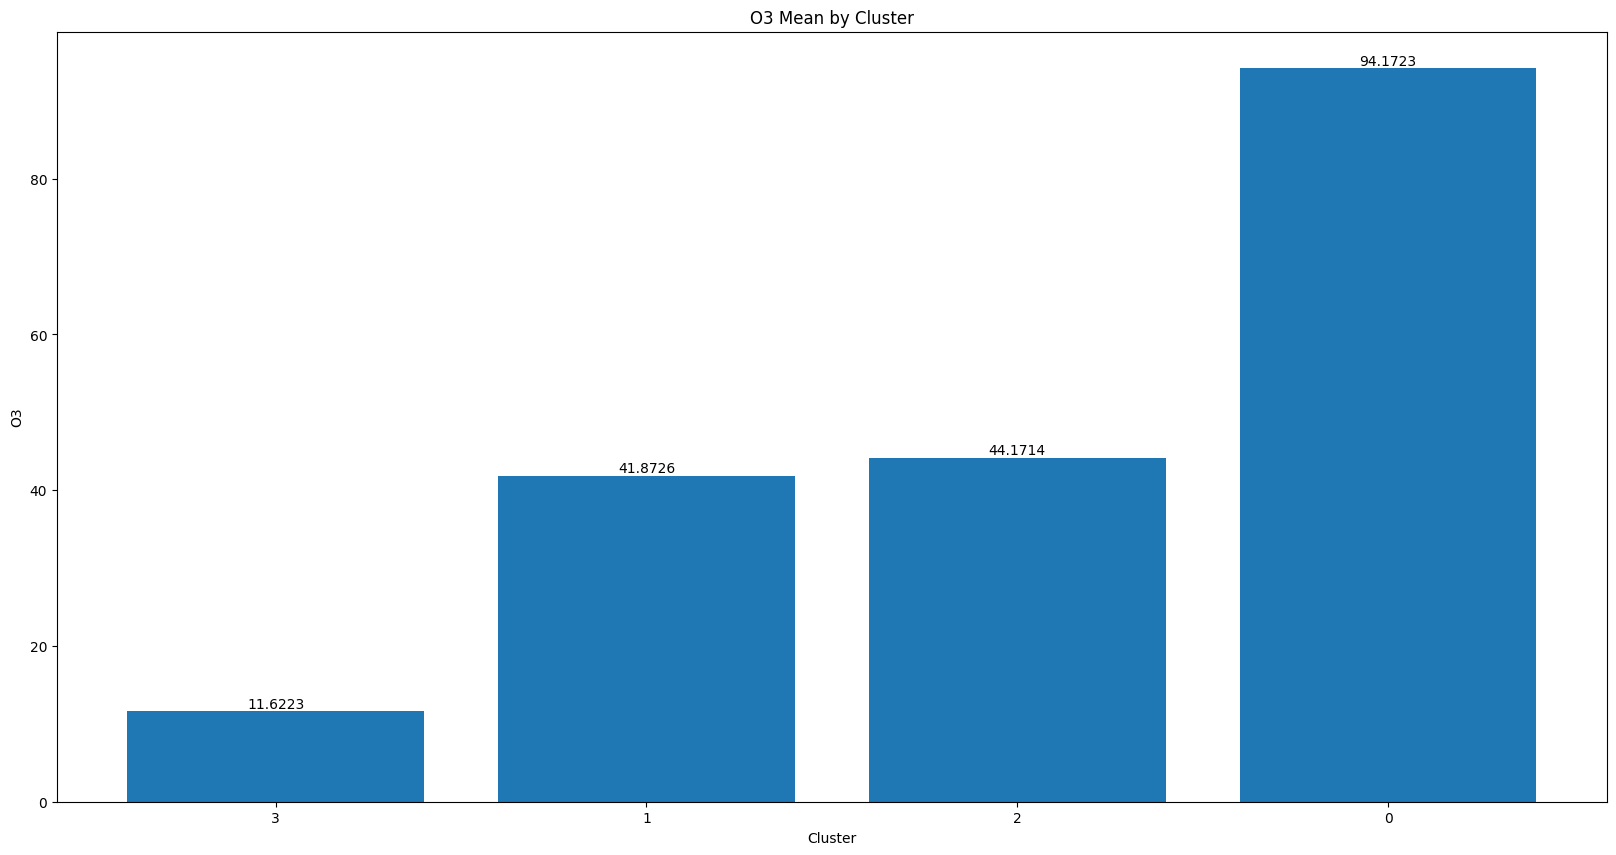

In [216]:
barchart_by_cluster(df_cluster, 'O3')

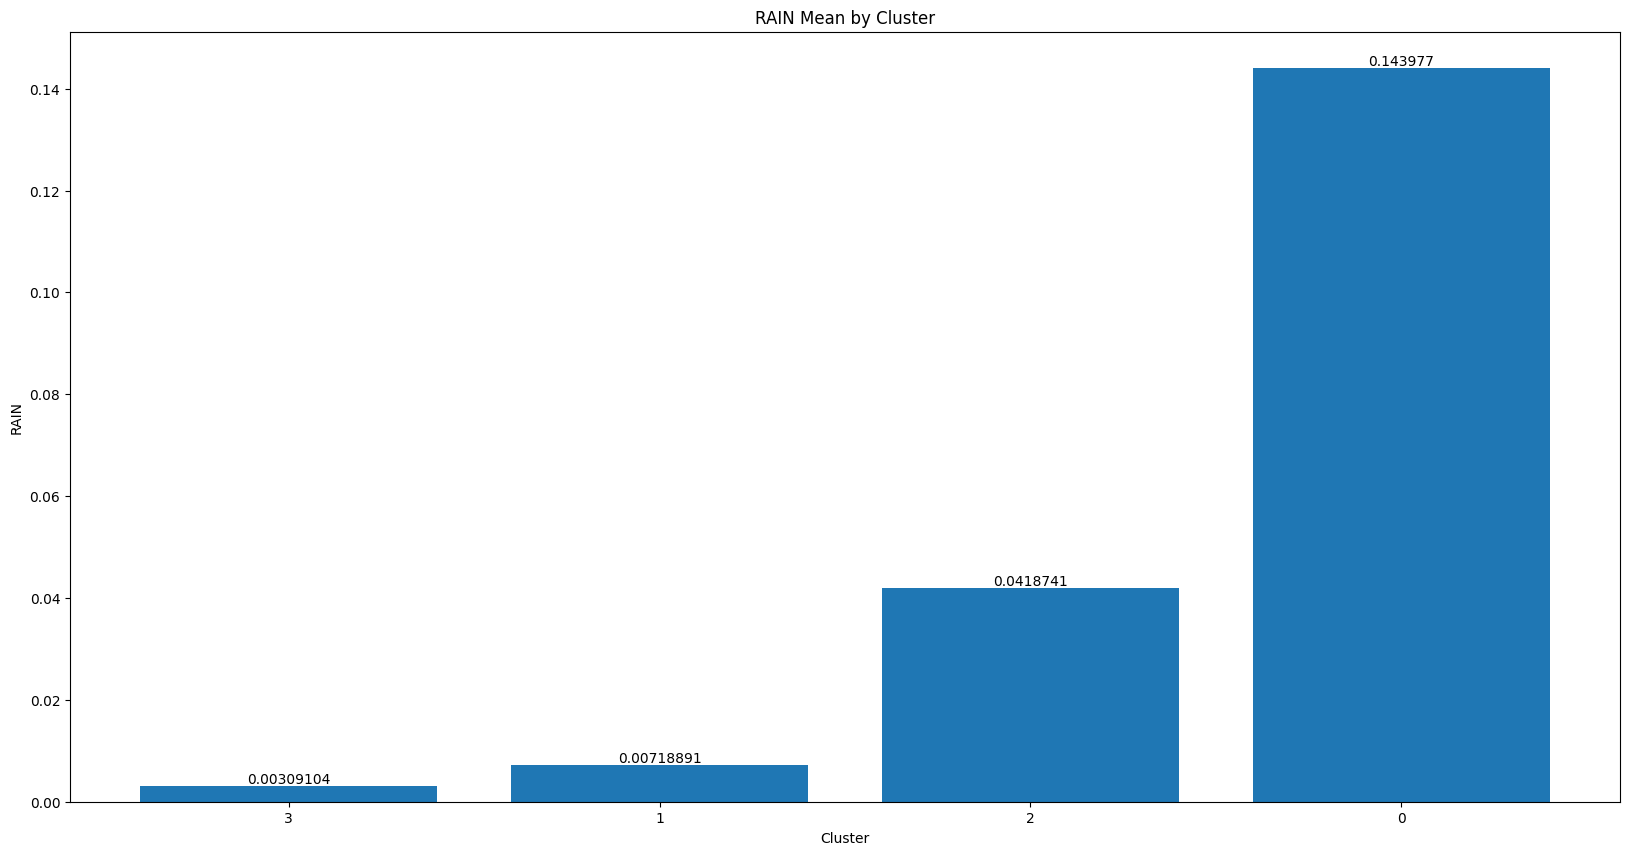

In [219]:
barchart_by_cluster(df_cluster, 'RAIN')

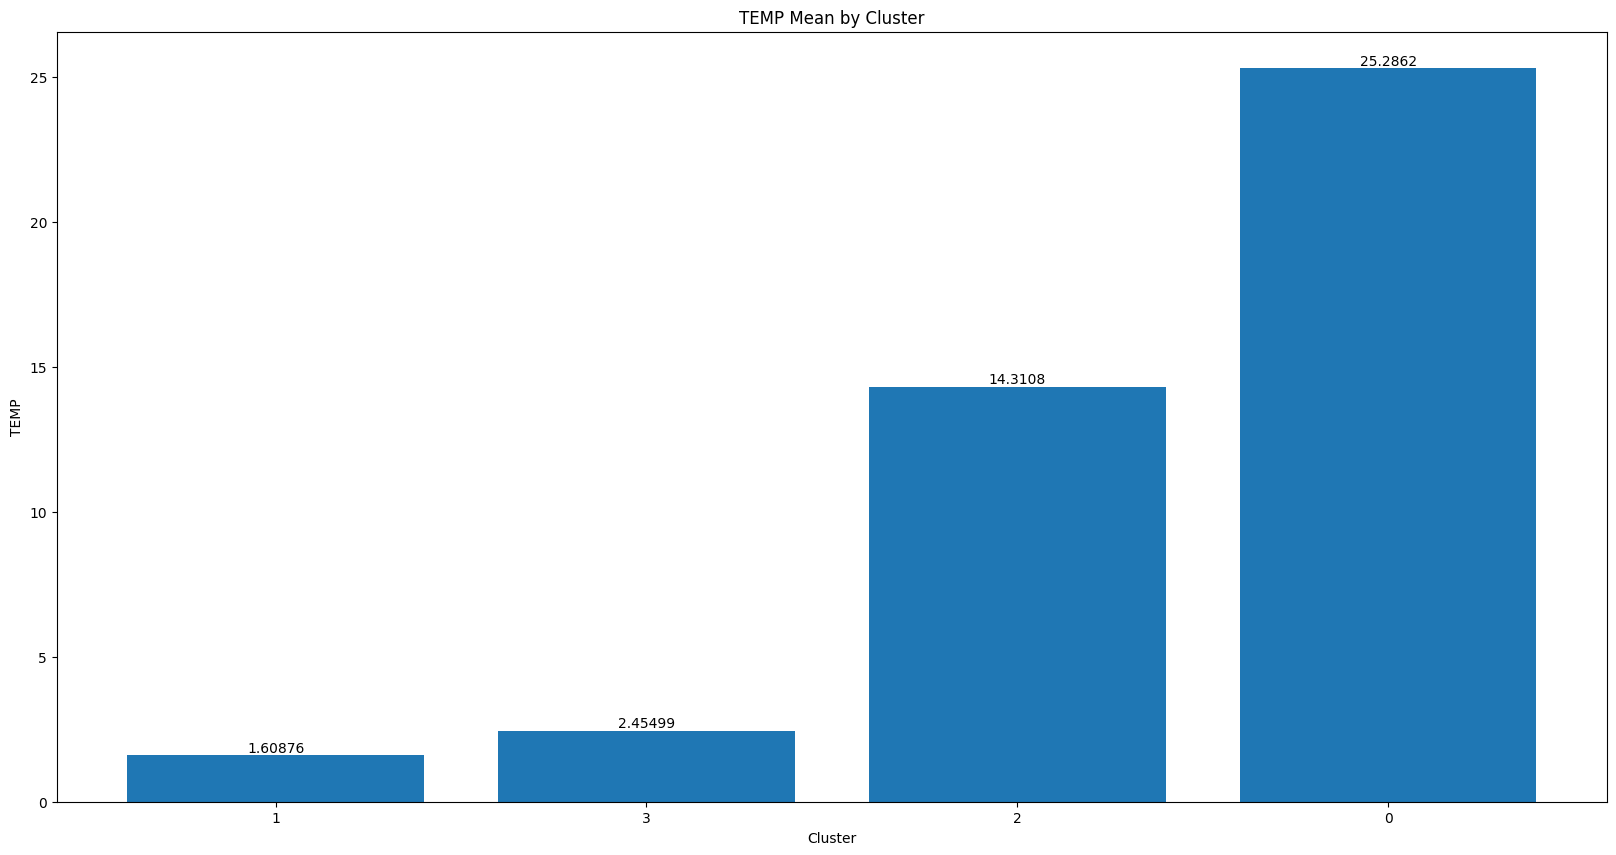

In [218]:
barchart_by_cluster(df_cluster, 'TEMP')

Ciri-ciri kluster 0:
- Kadar Ozon tertinggi
- Kadar Karbon Monoksida sedang
- Curah hujan tertinggi
- Temperature tertinggi

Ciri-ciri kluster 1:
- Kadar Ozon sedang
- Kadar Karbon Monoksida terendah
- Curah hujan rendah
- Temperature terendah

Ciri-ciri kluster 2:
- Kadar Ozon sedang
- Kadar Karbon Monoksida sedang
- Curah hujan sedang
- Temperature sedang

Ciri-ciri kluster 3:
- Kadar Ozon terendah
- Kadar Karbon Monoksida tertinggi
- Curah hujan terendah
- Temperature rendah